<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/3_5_2_%EB%B3%91%ED%95%A9_%EA%B5%B0%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=4823f938f7a6916148f9584123d76ef41355ab8e20bc343270d243a81f80e437
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits

from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer


import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(12,8)})

from pandas.core.common import random_state

# 3.5.2 병합군집
병합 군집은 다음과 같다.
병합 군집은 시작할때 각 포인트를 하나의 클러스터로 지정하고, 그다음 어떤 종료조건을 만족할 때가지 가장 비슷한 두 클러스터를 합쳐나간다. 종료조건은 지정된 클러스터가 남을 때 가지이다.

- ward
- average
- complete

ward 기본값, 대부분에 데이터셋에 알맞음
avg, cop 는 한 클러스터가 다른 것보다 매우 클 때 더 나을 수 있다.

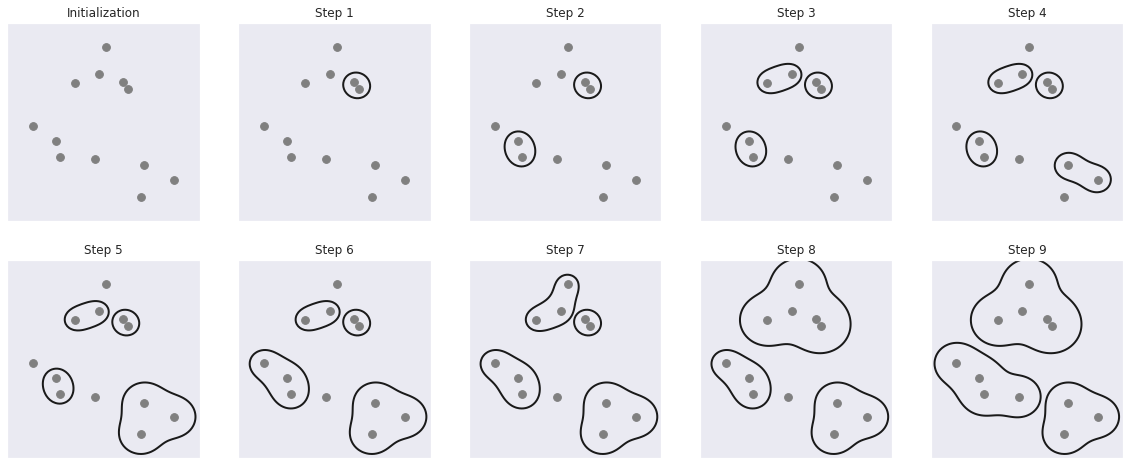

In [3]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'feature 1')

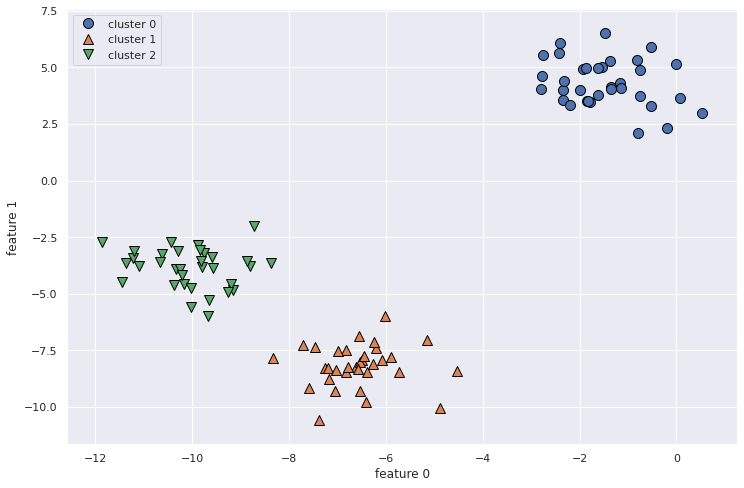

In [4]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:,1], assignment)
plt.legend(['cluster 0','cluster 1','cluster 2'], loc='best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

계층적 군집과 덴드로그램
병합군집은 계층적 군집을 만든다. 다음은 각 클러스터가 더 작은 클러스터로 어떻게 나뉘는지 잘 보여준다.

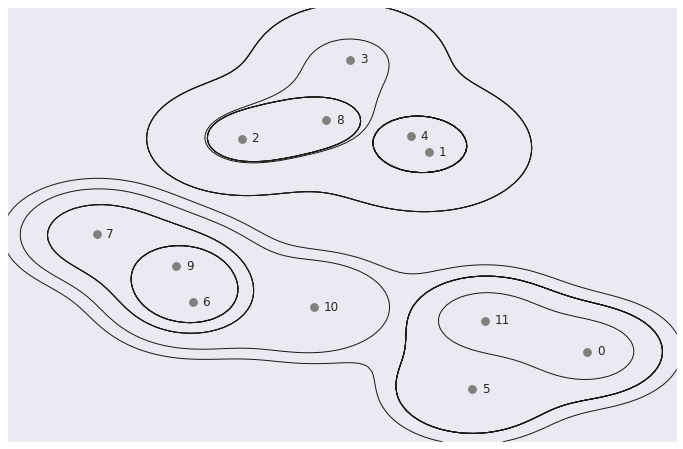

In [5]:
mglearn.plots.plot_agglomerative()

2차원 이상의 계층군집을 시각화하는 건 scikit-learn에서 아직 구연되지 않았다. 
그러나 Scipy 알고리즘은, 덴드로그램 그래프를 그려보여줄 수 있다.

Text(0, 0.5, 'cluster distence')

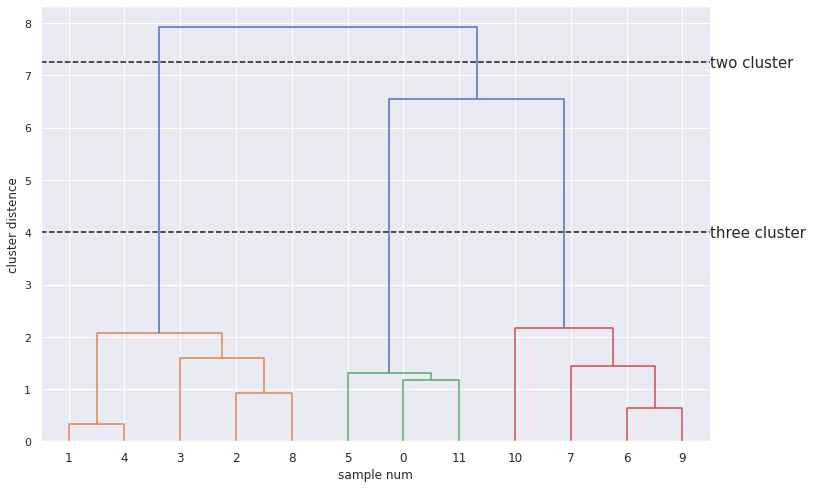

In [6]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트한다.
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X에 ward 함수를 적용한다.
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 답긴 배열을 반환한다.
linkage_array = ward(X)
# 덴드로그램을 그린다.
dendrogram(linkage_array)

# 두 개와 세개의 클러스터를 구분하는 커트라인을 표시한다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two cluster', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, 'three cluster', va='center', fontdict={'size':15})
plt.xlabel('sample num')
plt.ylabel('cluster distence')

scikit 0.24 버전에서 덴드로그램 함수를 그릴수 있게 되었다. 

In [7]:
agg = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
agg.fit(X)

print(agg.children_)

[[ 1  4]
 [ 6  9]
 [ 2  8]
 [ 0 11]
 [ 5 15]
 [ 7 13]
 [ 3 14]
 [12 18]
 [10 17]
 [16 20]
 [19 21]]


Text(0, 0.5, 'cluster distence')

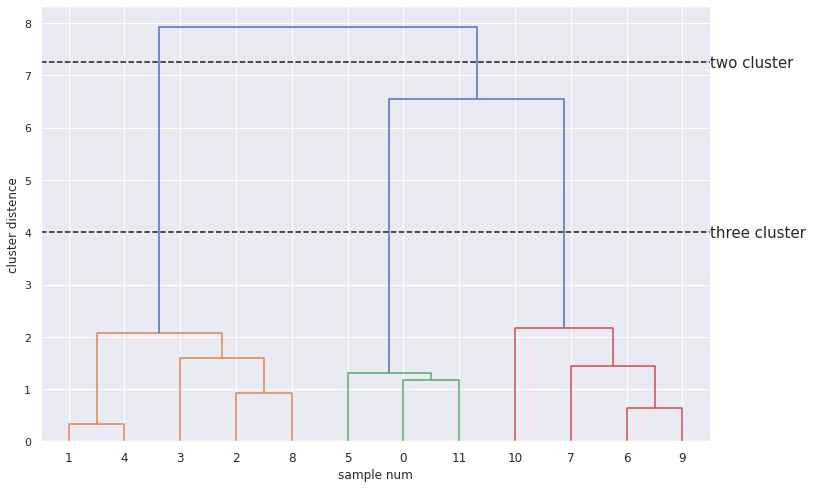

In [8]:
counts = np.zeros(agg.children_.shape[0])
n_samples = len(agg.labels_)
for i, merge in enumerate(agg.children_):
  current_count = 0
  for child_idx in merge:
    if child_idx < n_samples:
      current_count += 1 # 리프 노트
    else:
      current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([agg.children_, agg.distances_, counts])
# 클러스터 간의 거리 정보가 담긴 linkage matrix를 사용해 덴드로그램을 그린다.
dendrogram(linkage_matrix)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시한다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two cluster', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, 'three cluster', va='center', fontdict={'size':15})
plt.xlabel('sample num')
plt.ylabel('cluster distence')

## 3.5.3 DBSCAN

#### 장점
- 클러스터의 개수를 미리 지정할 필요없다.
- 복잡한 형상도 찾을 수 있다
- 어느 클래스에도 속하지 않는 포인트를 구분 가능하다

#### 포인트 종류
- 핵심 포인트(밀집지역에 포인트)
- 경계 포인트(핵심 포인트 에서 eps 거리 안에 있는 포인트)
- 잡음 포인트(따로 떨어진 일정 수 이하의 포인트)

In [9]:
from scipy import cluster
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("cluster label: \n", clusters)

# 작은 샘플이라 잡음포인트를 의미하는 -1 레이블이 할당되었다.
# 이는 데이터 샘플이 적합하지 않는 eps, n_samples 기본값 때문이다

cluster label: 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


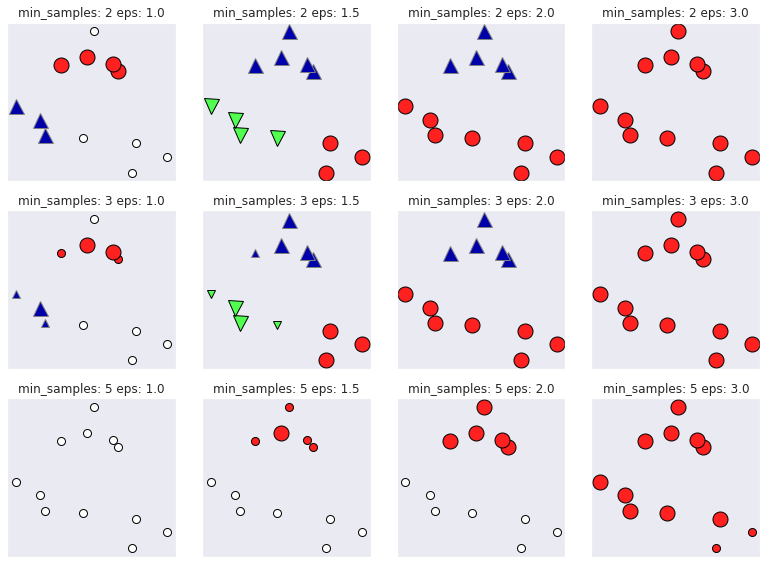

In [11]:
mglearn.plots.plot_dbscan()

eps 거리 안에 min_samples 보다 많은 포인트가 있으면 핵심으로 구분, 아니면 잡음으로 구분한다.
DBSCAN 은 크러스터의 개수를 지정할 필요는 없지만, eps 값은 간접적으로 몇 개의 클러스터가 만들어질지 제어한다. 적합한 eps 값을 쉽게 찾으려면 StandardScaler나  MinMaxScaler 로 모든 특성의 스케일을 비슷한 범위로 조정해주는 것이 좋다.

Text(0, 0.5, 'feature 1')

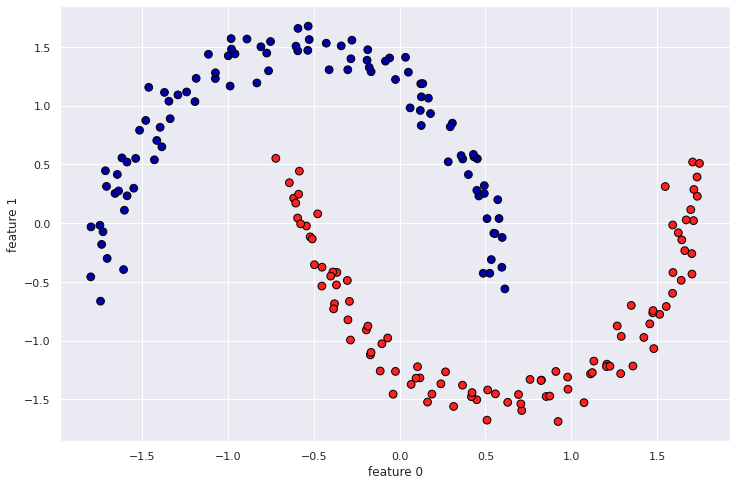

In [12]:
# two_moons 데이터셋에 DBSCAM을 적용한 결과이다. 이 알고리즘은 기본 설정값으로 두 개의 반달 모양을 정확히 찾아 구분한다.

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정한다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시한다.
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

기본 매개변수 설정이 잘 맞는다. 만약 eps 값을 기본값이 0.5에서 0.2로 내린다면 너무 많은 8개의 클러스터를 만들어 내며, 0.7로 올린다면 1개의 클러스터를 만든다.

\
## 3.5.4 군집 알고리즘의 비교와 평가
군집 알고리즘을 적용하는 데 어려운 점 하나는 알고리즘이 잘 작동하는지 평가하거나 여러 알고리즘의 출력을 비교하기가 매우 어렵다는 것이다.

\
#### 타깃 값으로 군집 평가하기
군집 알고리즘의 결과를 실제 정답 클러스터와 비교하여 평가할 수 있는 지표들이 있다. ARI, NMI가 가장 널리 이용된다.

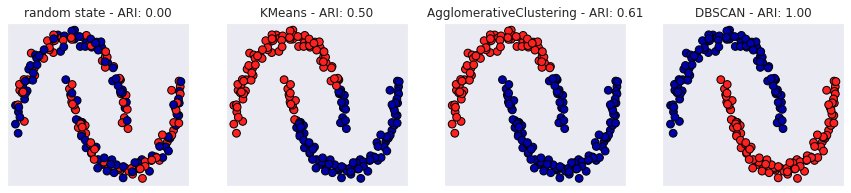

In [23]:
# ARI를 이용해 k-평군, 병합군집, DBSCAM 알고리즘을 비교한다
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 테이터의 스케일을 조정한다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만든다.
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당한다.
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그린다.
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
axes[0].set_title("random state - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
  # 클러스터 할당과 클러스터 중심을 그린다.
  clusters= algorithm.fit_predict(X_scaled)
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
  ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

군집 모델을 평가할 때, adjusted_rand_score 나  normalized_mutual_info_score 같은 증척 도구를 사용해야한다. **accuracy_score가** **아니다**.

In [25]:
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# 모든 레이블이 달라졌으므로 정확도는 0이다
print('accuracy: {:.2f}'.format(accuracy_score(clusters1, clusters2)))
# 같은 포인트가 클러스터에 모였으므로 ARI는 1이다.
print('ARI: {:.2f}'.format(adjusted_rand_score(clusters1, clusters2)))

accuracy: 0.00
ARI: 1.00


### 타깃값 없이 군집 평가하기

ARI의 큰 문제는, 결과와 비교할 타깃이 없다는 것이다.정확한 클러스터를 알고 잇다면 이 정보를 이용해 분휴기와 같은 지도 학습모델을 만들것이다. 그러므로 ARI 나 NMI 같은 지표는 애플리케이션의 성능 평가가 아니라 알고리즘을 개발 할 때나 도움이 된다.

타깃이 없는 군집용 지표로 '실수엣 계수'가 있다. 그러나 이 지표는 실제로 잘 동작하지는 않는다. 점수는 밀집 정도를 계산하여 나타내기 때문이다.

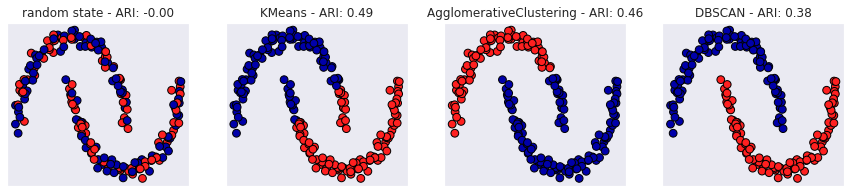

In [29]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 테이터의 스케일을 조정한다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당한다.
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그린다.
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
axes[0].set_title("random state - ARI: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
  # 클러스터 할당과 클러스터 중심을 그린다.
  clusters= algorithm.fit_predict(X_scaled)
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
  ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

클러스터 평가에 더 적합한 전략은 견고성 기반의 지표이다. 그러나 아직 이 기능은 scikit-learn에서 구현되지 않았다. 군집 모델이 매우 안정적이거나 실루엣 점수가 높다고 해도 군집에 어떤 유의미한 것이 있는지 또는 군집이 데이터의 흥미로운 면을 반영하고 있는지는 여전히 할 수 없다. 무슨 기준으로 나누는지는 우리가 직접확인해 봐야 한다(사진구분 > 나이 or 시간 대 or 휴대폰 기종 or 안경유무 or 성별 등등).

\
### 얼굴 데이터셋으로 군집 알고리즘 비교

LFW 데이터셋에 k-평균, DBSCAN, 병합 군집 알고리즘을 적용해보고 어떤 클러스터를 찾았는지 확인해보자. PCA 로 생성한 100개의 주성분, 즉 고유얼굴을 입력 데이터로 사용하겠다.

In [30]:
# LFW 데이터에서 고유얼국을 찾은 다음 데이터를 변환한다.
from sklearn.decomposition import PCA

from IPython.core.pylabtools import figsize
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255

pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [32]:
# DBSCAN 으로 얼국 데이터세 분석하기

# 기본 매개변수로 DBSCAN 을 적용한다.
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("unique label:", np.unique(labels))

unique label: [-1]


레이블이 -1 뿐이므로 모든 데이터가 DBSCAN에 의해 잡음 포인트로 레이블 되었다.
바꿀 수 있는건 두가지. eps 값을 크게 하여 각 포인트의 이웃을 늘릴 수 있고, min_samples 값을 낮춰 클러스터에 모을 포인트 수를 줄 일 수 있다.

In [33]:
# min_samples 줄이기
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("unique label:", np.unique(labels))

unique label: [-1]


여전히 잡음 처리됨 eps를 키우자

In [34]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("unique label:", np.unique(labels))

unique label: [-1  0]


클러스터 하나와 잡음 포인트 얻음. 데이터속 잡음에 대해 알아보자. 
우선 상황을 더 잘이해하기 위해. 잡음 포인트가 몇개인지, 클러스트에 속한 포인트가 몇개인지 확인한다.

In [35]:
# bincount 는 음수를 받을 수 없어 labels에 1을 더했다.
# 반환값의 첫 번째 원소는 잡음 포인트의 수이다.
print('클러스터별 포인트 수:', np.bincount(labels + 1))

클러스터별 포인트 수: [  32 2031]


32개 많지 않으니 확인해 보자

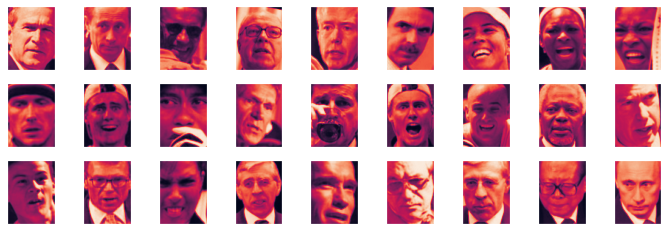

In [37]:
image_shape = people.images[0].shape

noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks':(), 'yticks':()}, figsize=(12, 4))

for image, ax in zip(noise, axes.ravel()):
  ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

# 잡음 처리된 이미지, 난해한 사진들(모자. 컵. 근접사진 등등)

In [39]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
  print('\neps=', eps)
  dbscan = DBSCAN(eps=eps, min_samples=3)
  labels = dbscan.fit_predict(X_pca)
  print('cluster labels :', len(np.unique(labels)))
  print('clusters count:', np.bincount(labels + 1))


eps= 1
cluster labels : 1
clusters count: [2063]

eps= 3
cluster labels : 1
clusters count: [2063]

eps= 5
cluster labels : 1
clusters count: [2063]

eps= 7
cluster labels : 14
clusters count: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps= 9
cluster labels : 4
clusters count: [1307  750    3    3]

eps= 11
cluster labels : 2
clusters count: [ 413 1650]

eps= 13
cluster labels : 2
clusters count: [ 120 1943]


클러스터가 하나 밖에 없다. 이는 데이터에 확연히 구분되는 얼굴 이미지가 두세 개가 아니고 모든 이미지는 거의 동일하게 나머지 이미지들과 비슷하다는(또는 비슷하지 않다는) 의미이다.

작은 클러스터가 많이 만들어진 eps=7의 결과는 더욱 흥미롭다. 13개의 클러스터에 있는 모든 포인트를 시각화해 조사해보자.

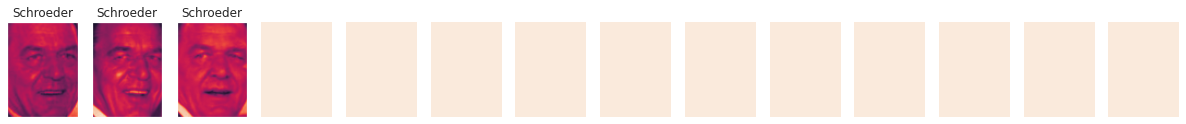

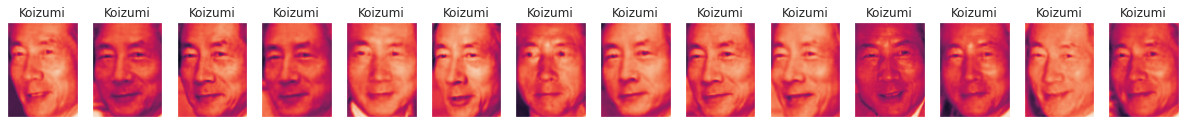

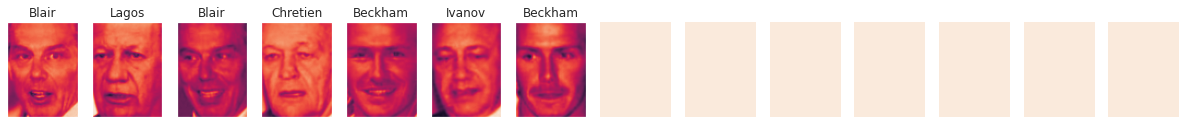

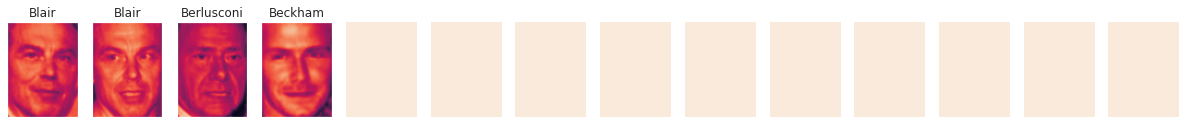

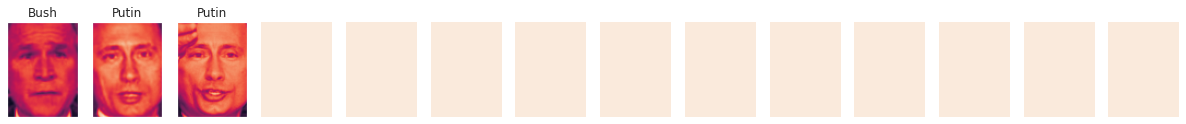

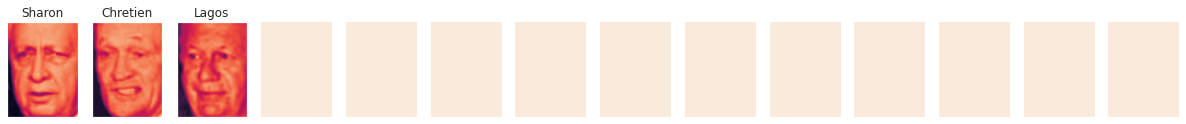

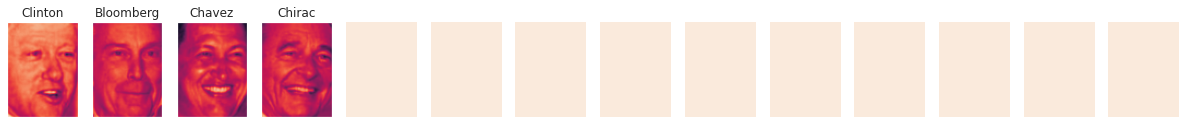

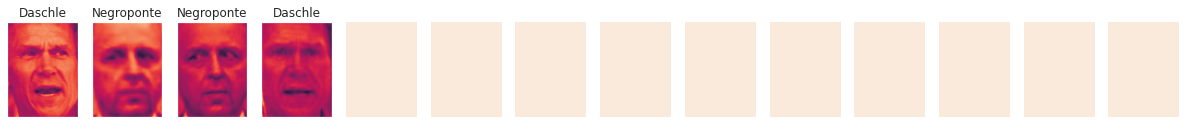

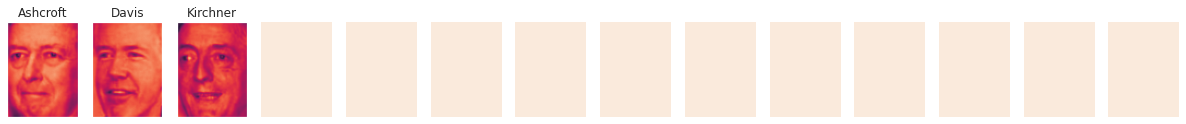

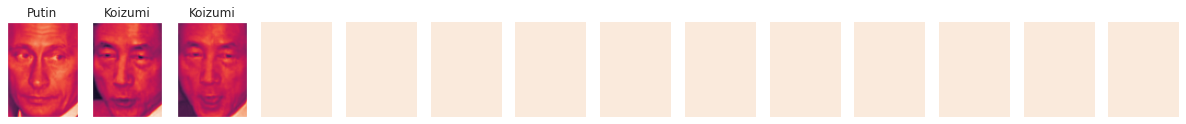

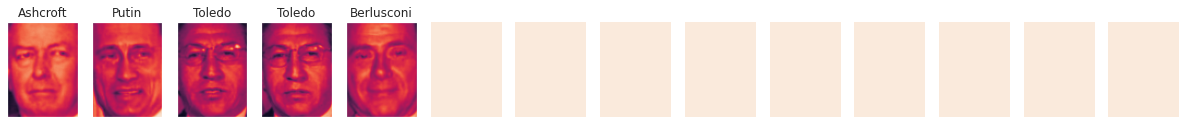

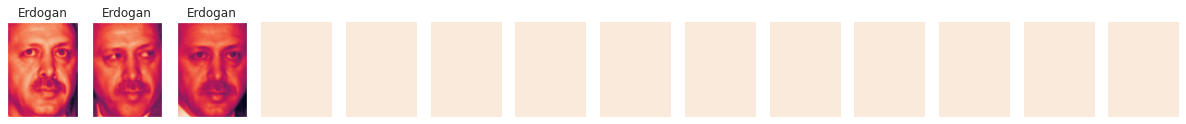

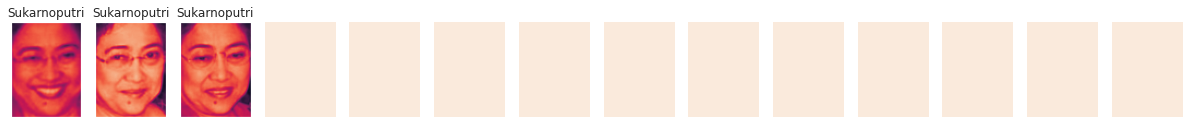

In [47]:
dbscan = DBSCAN(eps=7, min_samples=3)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels)+1):
  mask = labels == cluster
  n_images = np.sum(mask)
  fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})

  i = 0
  for image, label, ax in zip(X_people[mask], y_people[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_names[label].split()[-1])
    i += 1
  for j in range(len(axes) - i):
    axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
    axes[j+i].axis('off')